In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import io

In [7]:
class LowPassFilter():
    def __init__(self, alpha : float = 0.7):
        self.isfirst = True # check whether a data point is the first or not
        self.alpha = alpha # weight for previous value
        
    def update(self, x):
        # check the first data acquisition
        if self.isfirst:
            self.prevX = x
        
        xlpf = self.alpha * self.prevX + (1 - self.alpha) * x
        
        self.prevX = xlpf # update previous value
        self.isfirst = False
        return xlpf

    def init_memory(self):
        '''
        initialize previously saved values and status
        '''
        self.isfirst = True

In [8]:
class GetSonar():
    def __init__(self):
        '''
        Load sonar data
        '''
        self.sonarAlt = io.loadmat('../source/2.MovAvgFilter/SonarAlt.mat')
        self.sonarAlt = self.sonarAlt['sonarAlt'].reshape(-1)
        self.n = 0
        
        
    def __len__(self):
        return len(self.sonarAlt)
    
    def getdata(self):
        # if all data is used, get data from first sample 
        if self.n < len(self):
            data = self.sonarAlt[self.n]
            self.n += 1
            return data
        
        else:
            self.n = 0
            return self.sonarAlt[self.n]
        

In [9]:
Nsamples = 500
t = np.arange(0, 0.2*Nsamples, 0.2)

# container for filtered data
Xsaved = np.zeros(Nsamples)

# container for measured data
Xmsaved = np.zeros(Nsamples)

# define low pass filter instance
LPF = LowPassFilter()

# Load Sonar data 
Sonar = GetSonar() 

for idx in range(Nsamples):
    xm = Sonar.getdata() # get measured sonar data
    x = LPF.update(xm) # update filtered value
    
    Xmsaved[idx] = xm
    Xsaved[idx] = x

Text(0, 0.5, 'altitude (m)')

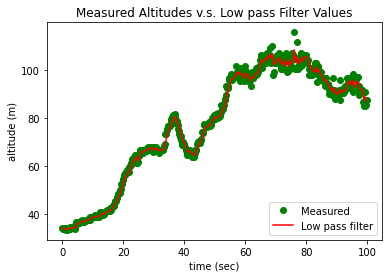

In [10]:
plt.plot(t, Xmsaved, 'go', label='Measured')
plt.plot(t, Xsaved, 'r-', label='Low pass filter')
plt.legend(loc='lower right')
plt.title('Measured Altitudes v.s. Low pass Filter Values')
plt.xlabel('time (sec)')
plt.ylabel('altitude (m)')